In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [80]:
trans_data = spark.read.csv('D:/Code_Place/Data-Science/Scikit Learn/trasport/ts_transport_fitness_01_03_2022to31_03_2022.csv', inferSchema=True, header=True)
trans_data.printSchema()

root
 |-- slno: integer (nullable = true)
 |-- registrationNo: string (nullable = true)
 |-- vehicleClass: string (nullable = true)
 |-- status: string (nullable = true)
 |-- validFrom: string (nullable = true)
 |-- validTo: string (nullable = true)
 |-- transactiontType: string (nullable = true)
 |-- OfficeCd: string (nullable = true)
 |-- fromdate: string (nullable = true)
 |-- todate: string (nullable = true)



In [81]:
trans_data.count()

76657

In [82]:
trans_data.head(5)

[Row(slno=770352, registrationNo='TS07UC8621', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2023', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=500609, registrationNo='TS01UC2799', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2024', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=530243, registrationNo='TS01UA7497', vehicleClass='Goods Carriage', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2024', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=16716, registrationNo='AP01V3757', vehicleClass='Trailer For Commercial Use', status='APPROVED', validFrom='02/03/2022', validTo='01/03/2023', transactiontType='Renewal', OfficeCd='RTA ADILABAD', fromdate='01/03/2022', todate='02/03/2022'),
 Row(slno=34122, registrat

In [21]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

+-------------------+-------------------+
|      skewness(_c0)|      kurtosis(_c0)|
+-------------------+-------------------+
|-0.3511757043707716|-1.0309084999246485|
+-------------------+-------------------+



In [83]:
trans_data.describe().show()

+-------+------------------+--------------+--------------------+--------+----------+----------+----------------+-----------------+----------+----------+
|summary|              slno|registrationNo|        vehicleClass|  status| validFrom|   validTo|transactiontType|         OfficeCd|  fromdate|    todate|
+-------+------------------+--------------+--------------------+--------+----------+----------+----------------+-----------------+----------+----------+
|  count|             76657|         76657|               76657|   76657|     76657|     76657|           76657|            76657|     76657|     76657|
|   mean| 713451.5525000979|          null|                null|    null|      null|      null|            null|             null|      null|      null|
| stddev|361718.45413726586|          null|                null|    null|      null|      null|            null|             null|      null|      null|
|    min|                90|       AAI3151|           Ambulance|APPROVED|01/02/202

In [84]:
from email import header
import numpy as np
import pandas as pd
from sqlalchemy import false
import tensorflow as tf

df = trans_data.toPandas()
df.head()

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,TS07UC8621,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
1,500609,TS01UC2799,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
2,530243,TS01UA7497,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
3,16716,AP01V3757,Trailer For Commercial Use,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
4,34122,AP01W8405,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022


In [85]:
col_list = df.columns
print(col_list)

Index(['slno', 'registrationNo', 'vehicleClass', 'status', 'validFrom',
       'validTo', 'transactiontType', 'OfficeCd', 'fromdate', 'todate'],
      dtype='object')


In [86]:
df.replace(np.nan,0)

,slno,registrationNo,vehicleClass,status,validFrom,validTo,transactiontType,OfficeCd,fromdate,todate
0,770352,TS07UC8621,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
1,500609,TS01UC2799,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
2,530243,TS01UA7497,Goods Carriage,APPROVED,02/03/2022,01/03/2024,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
3,16716,AP01V3757,Trailer For Commercial Use,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
4,34122,AP01W8405,Goods Carriage,APPROVED,02/03/2022,01/03/2023,Renewal,RTA ADILABAD,01/03/2022,02/03/2022
...,...,...,...,...,...,...,...,...,...,...
76652,65180,AP10U5158,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76653,66091,AP11T3969,Goods Carriage,APPROVED,31/03/2022,30/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76654,69196,AP10V5554,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022
76655,66901,AP09U5575,Goods Carriage,APPROVED,30/03/2022,29/03/2023,Renewal,RTA UPPAL,30/03/2022,31/03/2022


In [87]:
df.dtypes

slno                 int32
registrationNo      object
vehicleClass        object
status              object
validFrom           object
validTo             object
transactiontType    object
OfficeCd            object
fromdate            object
todate              object
dtype: object

In [92]:
df['registrationNo']

KeyError: 'registrationNo'

In [91]:
df['status'] = pd.Categorical(df['status'])
df = df['status'] = df.status.cat.codes

df.head()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=trans_data, x="sepal_length", bins=20)
plt.show()

ValueError: Cannot convert column into bool: please use '&' for 'and', '|' for 'or', '~' for 'not' when building DataFrame boolean expressions.

In [30]:
trans_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

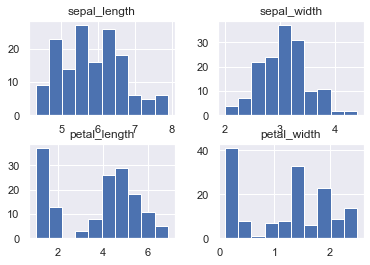

In [23]:
trans_data.hist()

<AxesSubplot:ylabel='count'>

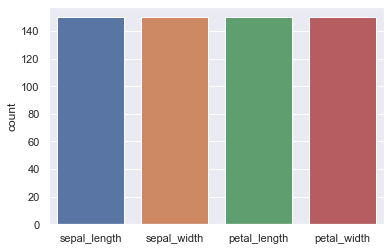

In [24]:
# # sns.heatmap(trans_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# sns.countplot(data=trans_data)

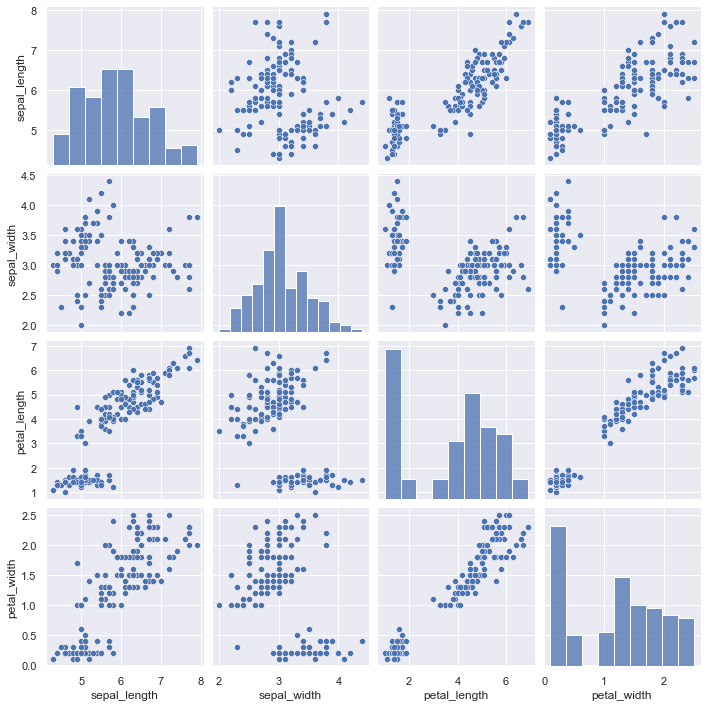

In [27]:
sns.pairplot(data=trans_data)

In [28]:


# trans_data.columns = trans_data.columns.str.replace('Unnamed: 32', 'TriggerW')
# trans_data['TriggerW']=np.random.randint(1, 18, trans_data.shape[0])
trans_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
trans_data = trans_data.drop('species',axis=1)	
trans_data.head()



,sepal_length,sepal_width,petal_length,petal_width,TriggerW
0,5.1,3.5,1.4,0.2,12
1,4.9,3.0,1.4,0.2,14
2,4.7,3.2,1.3,0.2,11
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,12


In [16]:
# Feature Matrix
x_orig = data.iloc[:, 1:-1].values

# Data labels
y_orig = data.iloc[:, -1:].values

print("Shape of Feature Matrix:", x_orig.shape)
print("Shape Label Vector:", y_orig.shape)


Data Shape: (150, 5)
Shape of Feature Matrix: (150, 3)
Shape Label Vector: (150, 1)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

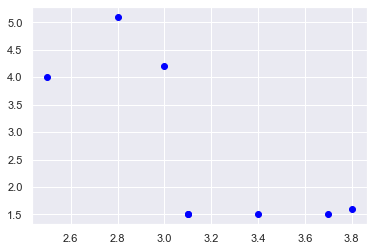

In [29]:
# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 1])

# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
									if y_orig[i] == 0])

# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')

# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()

plt.show()


In [31]:
from sklearn.preprocessing import OneHotEncoder
# Creating the One Hot Encoder
oneHot = OneHotEncoder()

# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)


m = 150
n = 88
Learning Rate = 0.0035
Number of Epochs = 500


In [35]:
from __future__ import print_function
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
# There are n columns in the feature matrix
# after One Hot Encoding.
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))

# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
					logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
		learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


tf


<module 'tensorflow.compat.v1' from 'c:\\python\\lib\\site-packages\\tensorflow\\_api\\v2\\compat\\v1\\__init__.py'>

In [36]:
# Starting the Tensorflow Session
with tf.Session() as sess:
	
	# Initializing the Variables
	sess.run(init)
	
	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []
	
	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0
		
		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X : x, Y : y})
		
		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X : x, Y : y})
		
		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
										tf.argmax(Y, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction,
												tf.float32))
		
		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
		
		# Displaying result on current Epoch
		if epoch % 100 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1]))
	
	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias
	
	# Final Accuracy
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
									tf.argmax(Y, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,
											tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")


ValueError: Cannot feed value of shape (150, 17) for Tensor Placeholder_9:0, which has shape (?, 2)

In [14]:
trans_data["Survived"] = 0
X = trans_data.drop('Survived',axis=1)
y = trans_data['Survived']

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

X_train.shape, X_test.shape

((90, 5), (60, 5))

In [16]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [17]:
lenreg = LogisticRegression()

print(y_train[0:10])
y_train.to_csv('ytard.csv')

if len(np.sum(y_train)) in [len(y_train),0]:
    print("all one class")
    #do something else
else:
    #OK to proceed
    lenreg.fit(X_train, y_train)
    y_pred = lenreg.predict(X_test)
    print(metics.accuracy_score(y_test, y_pred))


6      0
51     0
118    0
136    0
84     0
14     0
78     0
3      0
142    0
120    0
Name: Survived, dtype: int64


TypeError: object of type 'numpy.int64' has no len()